In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pydyns as dyns

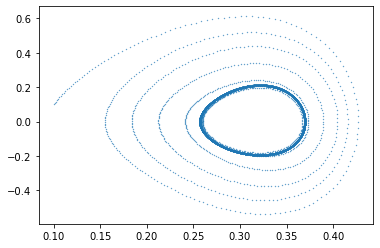

([-0.4989356825267333, -0.5010642244027506], None)

In [2]:
# вычисление спектра показателей и траектории
N = 100

f0 = 0.5

ds = ds = dyns.DynamicSystem([0.1,0.1], ["y", "f*sin(sin(3.5*t))-y+10*x-100*x^3"], 'x,y', f'f:={f0};')
ds.SetDt(0.01)

trajectory = ds.GetTrajectory(N)
# образец траектории при Omega = Omega0
xy = np.array(trajectory).transpose()
x, y = xy[0], xy[1]
plt.scatter(x=x, y=y, s=0.1)

spectre = ds.GetSpectrumLyapunov(1000)
spectre, plt.show()

In [3]:
# карта показателей Ляпунова
lyapunov_map = dyns.GetMapLyapunovExponents(
    np.array([0.1, 0.1], dtype=np.longdouble),
    ["y", "f*sin(sin(3.5*t))-y+10*x-100*x^3"],
    'x,y',
    '',
    ('f', 'dummy'),
    ((0.0, 2.1), (-0.1, 0.1)),
    (0.1, 0.1),
    100.0,
    100.0,
    0.01
)

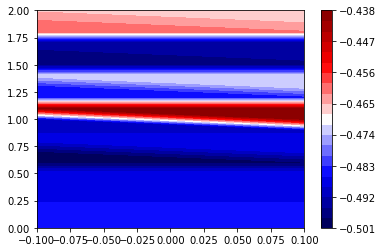

In [11]:
LSs = {
    'f':[],
    'lambda1':[],
    'lambda2':[],
}

lyapunov_map_res = np.zeros((21, 2))
for _f in range(2):
    for _w in range(21):
        if _f == 1:
            LSs['f'].append(_w/10)
            LSs['lambda1'].append(lyapunov_map[_w*2+_f][1])
        lyapunov_map_res[_w][_f] = lyapunov_map[_w*2+_f][1]
plt.contourf(np.linspace(-0.1, 0.1, 2), np.linspace(0, 2, 21), lyapunov_map_res, 20, cmap='seismic')
plt.colorbar()
plt.show()

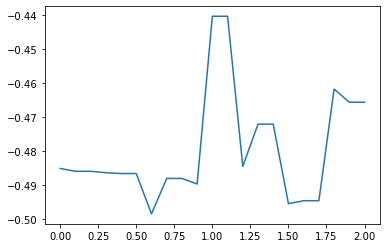

In [13]:
plt.plot(LSs['f'], LSs['lambda1'])
plt.show()